In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [31]:
df = pd.read_csv("Breast_Cancer.csv")

# Kategorik değişkenleri sayısal değerlere çevir
le = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])


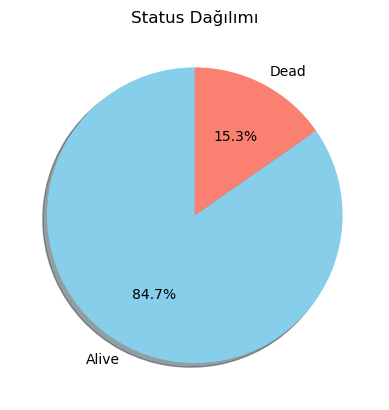

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Status'].value_counts().plot.pie(
    labels=["Alive", "Dead"], 
    autopct='%1.1f%%',
    colors=["skyblue", "salmon"],
    startangle=90,
    shadow=True
)
plt.title("Status Dağılımı")
plt.ylabel("")
plt.show()

In [33]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_encoded.drop(columns=["Status"]))
y = df_encoded["Status"]
X_scaled_df = pd.DataFrame(X_scaled, columns=df_encoded.drop(columns=["Status"]).columns)

In [34]:
print(X_scaled_df.head())

        Age  Race  Marital Status  T Stage   N Stage  6th Stage  \
0  0.974359   1.0            0.25  0.000000      0.0       0.00   
1  0.512821   1.0            0.25  0.333333      0.5       0.50   
2  0.717949   1.0            0.00  0.666667      1.0       1.00   
3  0.717949   1.0            0.25  0.000000      0.0       0.00   
4  0.435897   1.0            0.25  0.333333      0.0       0.25   

   differentiate     Grade  A Stage  Tumor Size  Estrogen Status  \
0       0.333333  1.000000      1.0    0.021583              1.0   
1       0.000000  0.666667      1.0    0.244604              1.0   
2       0.000000  0.666667      1.0    0.446043              1.0   
3       0.333333  1.000000      1.0    0.122302              1.0   
4       0.333333  1.000000      1.0    0.287770              1.0   

   Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0                  1.0                0.383333               0.000000   
1                  1.0                0.21

In [35]:
skb = SelectKBest(score_func=f_classif, k=5)
skb.fit(X_scaled_df, y)
skb_features = X_scaled_df.columns[skb.get_support()].tolist()
print("SelectKBest ile seçilen özellikler:", skb_features)


SelectKBest ile seçilen özellikler: ['N Stage', '6th Stage', 'Estrogen Status', 'Reginol Node Positive', 'Survival Months']


In [36]:
rfe_estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rfe_estimator, n_features_to_select=5)
rfe.fit(X_scaled_df, y)
rfe_features = X_scaled_df.columns[rfe.get_support()].tolist()
print("RFE ile seçilen özellikler:", rfe_features)


RFE ile seçilen özellikler: ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']


In [37]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_scaled_df, y)
importances = pd.Series(rf_model.feature_importances_, index=X_scaled_df.columns)
rf_features = importances.nlargest(5).index.tolist()
print("Feature Importance ile seçilen özellikler:", rf_features)


Feature Importance ile seçilen özellikler: ['Survival Months', 'Age', 'Regional Node Examined', 'Tumor Size', 'Reginol Node Positive']


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Özellikler ve hedef
X = X_scaled_df[skb_features]
y = df_encoded["Status"]

# Eğitim-test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# Sonuçlar
print("🔵 [SelectKBest] KNN Doğruluk:", round(accuracy_score(y_test, knn_pred), 2))
print("🟢 [SelectKBest] Naive Bayes Doğruluk:", round(accuracy_score(y_test, nb_pred), 2))
print("\n🔵 KNN Raporu\n", classification_report(y_test, knn_pred, target_names=['Alive', 'Dead']))
print("\n🟢 Naive Bayes Raporu\n", classification_report(y_test, nb_pred, target_names=['Alive', 'Dead']))


🔵 [SelectKBest] KNN Doğruluk: 0.91
🟢 [SelectKBest] Naive Bayes Doğruluk: 0.83

🔵 KNN Raporu
               precision    recall  f1-score   support

       Alive       0.92      0.98      0.95       863
        Dead       0.77      0.50      0.60       143

    accuracy                           0.91      1006
   macro avg       0.85      0.74      0.78      1006
weighted avg       0.90      0.91      0.90      1006


🟢 Naive Bayes Raporu
               precision    recall  f1-score   support

       Alive       0.91      0.89      0.90       863
        Dead       0.41      0.49      0.45       143

    accuracy                           0.83      1006
   macro avg       0.66      0.69      0.67      1006
weighted avg       0.84      0.83      0.83      1006



In [39]:
# Özellikler ve hedef
X = X_scaled_df[rfe_features]
y = df_encoded["Status"]

# Eğitim-test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# Sonuçlar
print("🔵 [RFE] KNN Doğruluk:", round(accuracy_score(y_test, knn_pred), 2))
print("🟢 [RFE] Naive Bayes Doğruluk:", round(accuracy_score(y_test, nb_pred), 2))
print("\n🔵 KNN Raporu\n", classification_report(y_test, knn_pred, target_names=['Alive', 'Dead']))
print("\n🟢 Naive Bayes Raporu\n", classification_report(y_test, nb_pred, target_names=['Alive', 'Dead']))


🔵 [RFE] KNN Doğruluk: 0.9
🟢 [RFE] Naive Bayes Doğruluk: 0.88

🔵 KNN Raporu
               precision    recall  f1-score   support

       Alive       0.91      0.98      0.94       863
        Dead       0.75      0.43      0.54       143

    accuracy                           0.90      1006
   macro avg       0.83      0.70      0.74      1006
weighted avg       0.89      0.90      0.89      1006


🟢 Naive Bayes Raporu
               precision    recall  f1-score   support

       Alive       0.91      0.95      0.93       863
        Dead       0.59      0.46      0.52       143

    accuracy                           0.88      1006
   macro avg       0.75      0.70      0.73      1006
weighted avg       0.87      0.88      0.87      1006



In [40]:
# Özellikler ve hedef
X = X_scaled_df[rf_features]
y = df_encoded["Status"]

# Eğitim-test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# Sonuçlar
print("🔵 [Feature Importance] KNN Doğruluk:", round(accuracy_score(y_test, knn_pred), 2))
print("🟢 [Feature Importance] Naive Bayes Doğruluk:", round(accuracy_score(y_test, nb_pred), 2))
print("\n🔵 KNN Raporu\n", classification_report(y_test, knn_pred, target_names=['Alive', 'Dead']))
print("\n🟢 Naive Bayes Raporu\n", classification_report(y_test, nb_pred, target_names=['Alive', 'Dead']))


🔵 [Feature Importance] KNN Doğruluk: 0.9
🟢 [Feature Importance] Naive Bayes Doğruluk: 0.88

🔵 KNN Raporu
               precision    recall  f1-score   support

       Alive       0.91      0.98      0.94       863
        Dead       0.75      0.43      0.54       143

    accuracy                           0.90      1006
   macro avg       0.83      0.70      0.74      1006
weighted avg       0.89      0.90      0.89      1006


🟢 Naive Bayes Raporu
               precision    recall  f1-score   support

       Alive       0.91      0.95      0.93       863
        Dead       0.59      0.46      0.52       143

    accuracy                           0.88      1006
   macro avg       0.75      0.70      0.73      1006
weighted avg       0.87      0.88      0.87      1006



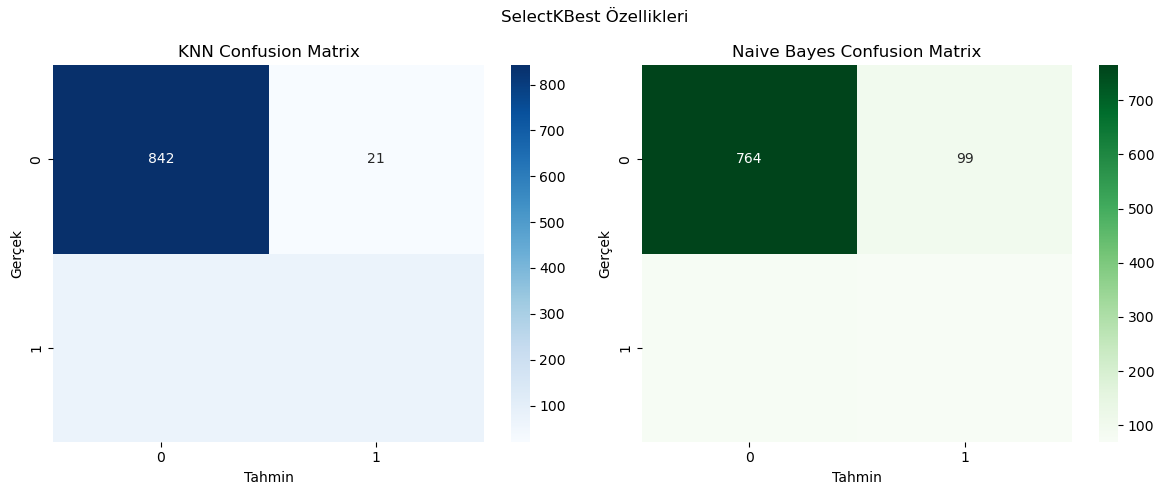

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# SelectKBest ile veriyi hazırla
X = X_scaled_df[skb_features]
y = df_encoded["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modelleri eğit
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# Confusion matrix'leri çiz
cm_knn = confusion_matrix(y_test, knn_pred)
cm_nb = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(12, 5))
plt.suptitle("SelectKBest Özellikleri")

plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix"), plt.xlabel("Tahmin"), plt.ylabel("Gerçek")

plt.subplot(1, 2, 2)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title("Naive Bayes Confusion Matrix"), plt.xlabel("Tahmin"), plt.ylabel("Gerçek")

plt.tight_layout()
plt.show()


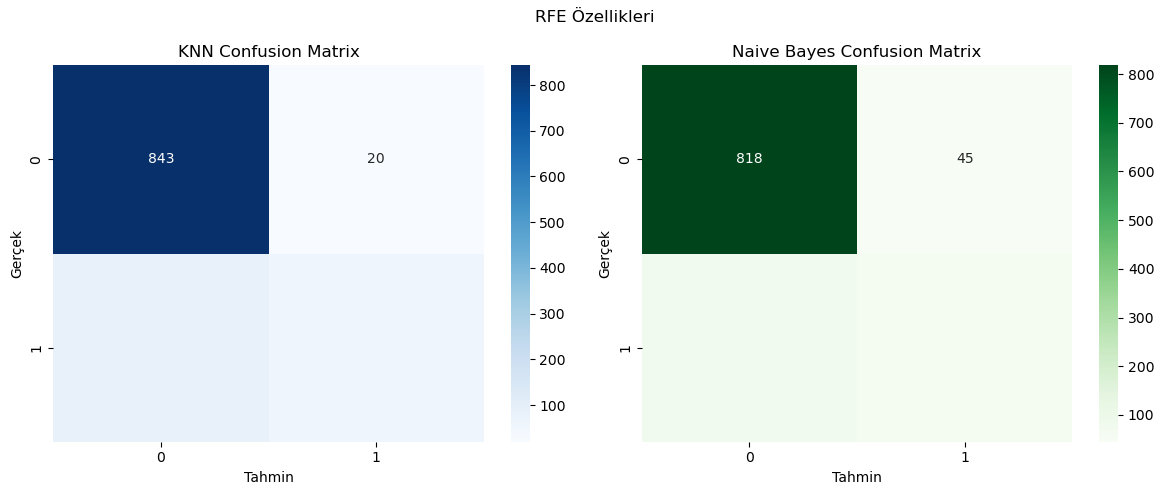

In [42]:
X = X_scaled_df[rfe_features]
y = df_encoded["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

cm_knn = confusion_matrix(y_test, knn_pred)
cm_nb = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(12, 5))
plt.suptitle("RFE Özellikleri")

plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix"), plt.xlabel("Tahmin"), plt.ylabel("Gerçek")

plt.subplot(1, 2, 2)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title("Naive Bayes Confusion Matrix"), plt.xlabel("Tahmin"), plt.ylabel("Gerçek")

plt.tight_layout()
plt.show()


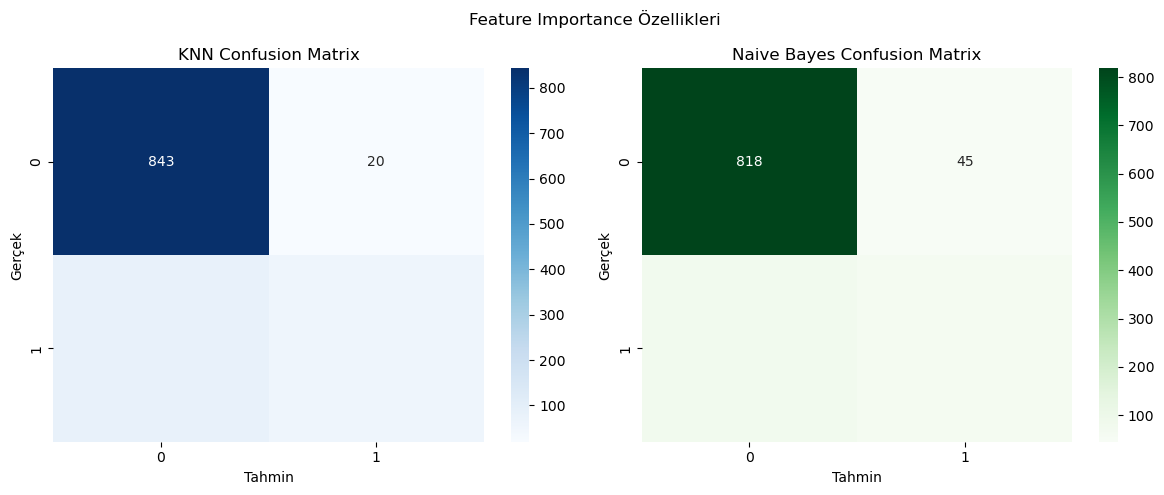

In [43]:
X = X_scaled_df[rf_features]
y = df_encoded["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

cm_knn = confusion_matrix(y_test, knn_pred)
cm_nb = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(12, 5))
plt.suptitle("Feature Importance Özellikleri")

plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix"), plt.xlabel("Tahmin"), plt.ylabel("Gerçek")

plt.subplot(1, 2, 2)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title("Naive Bayes Confusion Matrix"), plt.xlabel("Tahmin"), plt.ylabel("Gerçek")

plt.tight_layout()
plt.show()


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

X = X_scaled_df[skb_features]
y = LabelEncoder().fit_transform(df_encoded["Status"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📘 [SelectKBest] Random Forest Accuracy:", round(acc, 2))
print("📘 [SelectKBest] Random Forest F1 Score:", round(f1, 2))
print("\n📘 Random Forest Raporu (SelectKBest)\n")
print(classification_report(y_test, y_pred, target_names=["Alive", "Dead"]))



📘 [SelectKBest] Random Forest Accuracy: 0.89
📘 [SelectKBest] Random Forest F1 Score: 0.57

📘 Random Forest Raporu (SelectKBest)

              precision    recall  f1-score   support

       Alive       0.92      0.95      0.93       863
        Dead       0.62      0.53      0.57       143

    accuracy                           0.89      1006
   macro avg       0.77      0.74      0.75      1006
weighted avg       0.88      0.89      0.88      1006



In [45]:
X = X_scaled_df[rfe_features]
y = LabelEncoder().fit_transform(df_encoded["Status"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📘 [RFE] Random Forest Accuracy:", round(acc, 2))
print("📘 [RFE] Random Forest F1 Score:", round(f1, 2))
print("\n📘 Random Forest Raporu (RFE)\n")
print(classification_report(y_test, y_pred, target_names=["Alive", "Dead"]))


📘 [RFE] Random Forest Accuracy: 0.9
📘 [RFE] Random Forest F1 Score: 0.58

📘 Random Forest Raporu (RFE)

              precision    recall  f1-score   support

       Alive       0.92      0.97      0.94       863
        Dead       0.74      0.48      0.58       143

    accuracy                           0.90      1006
   macro avg       0.83      0.73      0.76      1006
weighted avg       0.89      0.90      0.89      1006



In [46]:
X = X_scaled_df[rf_features]
y = LabelEncoder().fit_transform(df_encoded["Status"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📘 [Feature Importance] Random Forest Accuracy:", round(acc, 2))
print("📘 [Feature Importance] Random Forest F1 Score:", round(f1, 2))
print("\n📘 Random Forest Raporu (Feature Importance)\n")
print(classification_report(y_test, y_pred, target_names=["Alive", "Dead"]))


📘 [Feature Importance] Random Forest Accuracy: 0.9
📘 [Feature Importance] Random Forest F1 Score: 0.57

📘 Random Forest Raporu (Feature Importance)

              precision    recall  f1-score   support

       Alive       0.92      0.97      0.94       863
        Dead       0.73      0.47      0.57       143

    accuracy                           0.90      1006
   macro avg       0.82      0.72      0.76      1006
weighted avg       0.89      0.90      0.89      1006



In [47]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Veriyi hazırla
X = X_scaled_df[skb_features]
y = LabelEncoder().fit_transform(df_encoded["Status"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modeli oluştur ve eğit
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Tahmin ve metrikler
y_pred = model.predict(X_test)
print("📙 [SelectKBest] Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\n📙 Decision Tree Raporu (SelectKBest)\n")
print(classification_report(y_test, y_pred, target_names=["Alive", "Dead"]))




📙 [SelectKBest] Decision Tree Accuracy: 0.88

📙 Decision Tree Raporu (SelectKBest)

              precision    recall  f1-score   support

       Alive       0.92      0.94      0.93       863
        Dead       0.58      0.48      0.53       143

    accuracy                           0.88      1006
   macro avg       0.75      0.71      0.73      1006
weighted avg       0.87      0.88      0.87      1006



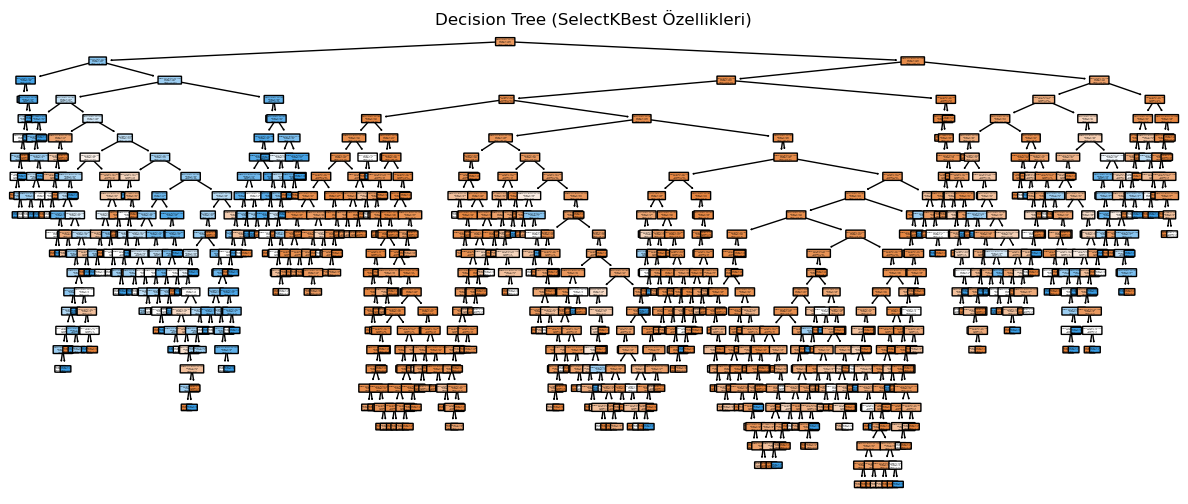

In [48]:
# Karar ağacını çiz
plt.figure(figsize=(15, 6))
plot_tree(model, feature_names=skb_features, class_names=['Alive', 'Dead'], filled=True, rounded=True)
plt.title("Decision Tree (SelectKBest Özellikleri)")
plt.show()

In [49]:
X = X_scaled_df[rfe_features]
y = LabelEncoder().fit_transform(df_encoded["Status"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("📙 [RFE] Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\n📙 Decision Tree Raporu (RFE)\n")
print(classification_report(y_test, y_pred, target_names=["Alive", "Dead"]))

📙 [RFE] Decision Tree Accuracy: 0.84

📙 Decision Tree Raporu (RFE)

              precision    recall  f1-score   support

       Alive       0.92      0.90      0.91       863
        Dead       0.46      0.52      0.49       143

    accuracy                           0.84      1006
   macro avg       0.69      0.71      0.70      1006
weighted avg       0.85      0.84      0.85      1006



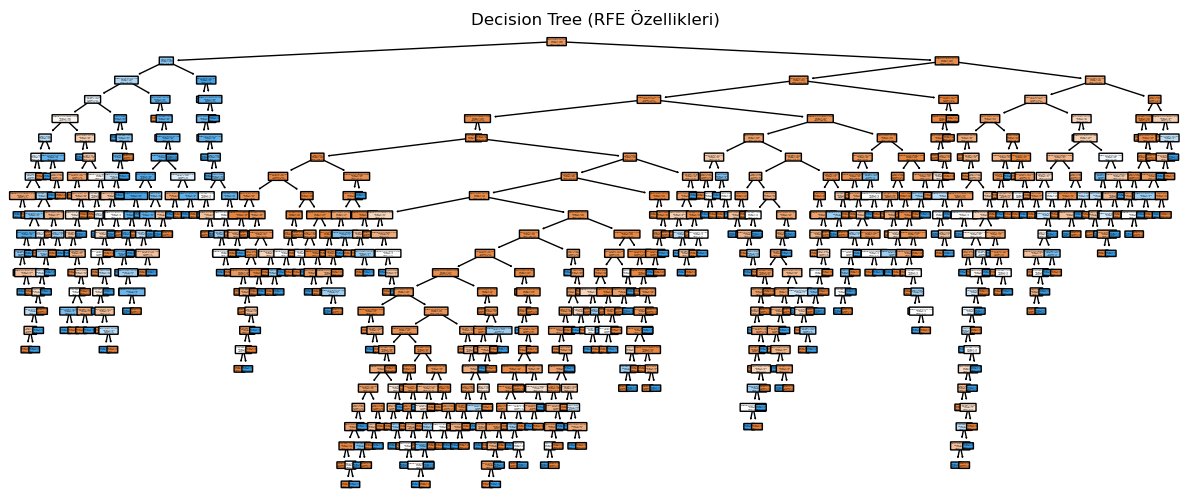

In [50]:
plt.figure(figsize=(15, 6))
plot_tree(model, feature_names=rfe_features, class_names=['Alive', 'Dead'], filled=True, rounded=True)
plt.title("Decision Tree (RFE Özellikleri)")
plt.show()

In [51]:
X = X_scaled_df[rf_features]
y = LabelEncoder().fit_transform(df_encoded["Status"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("📙 [Feature Importance] Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\n📙 Decision Tree Raporu (Feature Importance)\n")
print(classification_report(y_test, y_pred, target_names=["Alive", "Dead"]))

📙 [Feature Importance] Decision Tree Accuracy: 0.85

📙 Decision Tree Raporu (Feature Importance)

              precision    recall  f1-score   support

       Alive       0.92      0.90      0.91       863
        Dead       0.47      0.52      0.49       143

    accuracy                           0.85      1006
   macro avg       0.69      0.71      0.70      1006
weighted avg       0.86      0.85      0.85      1006



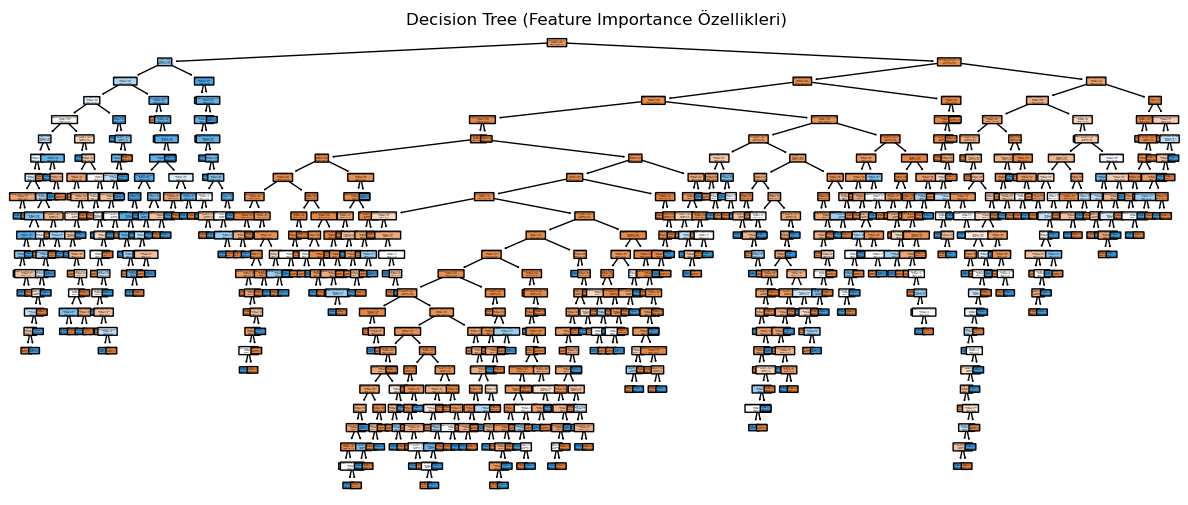

In [52]:
plt.figure(figsize=(15, 6))
plot_tree(model, feature_names=rf_features, class_names=['Alive', 'Dead'], filled=True, rounded=True)
plt.title("Decision Tree (Feature Importance Özellikleri)")
plt.show()

In [53]:
from sklearn.metrics import classification_report

X = X_scaled_df[skb_features]
y = LabelEncoder().fit_transform(df_encoded["Status"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("📘 [SelectKBest] Decision Tree (max_depth=3) Raporu:\n")
print(classification_report(y_test, y_pred, target_names=["Alive", "Dead"]))

📘 [SelectKBest] Decision Tree (max_depth=3) Raporu:

              precision    recall  f1-score   support

       Alive       0.93      0.97      0.95       863
        Dead       0.74      0.57      0.64       143

    accuracy                           0.91      1006
   macro avg       0.84      0.77      0.80      1006
weighted avg       0.90      0.91      0.91      1006



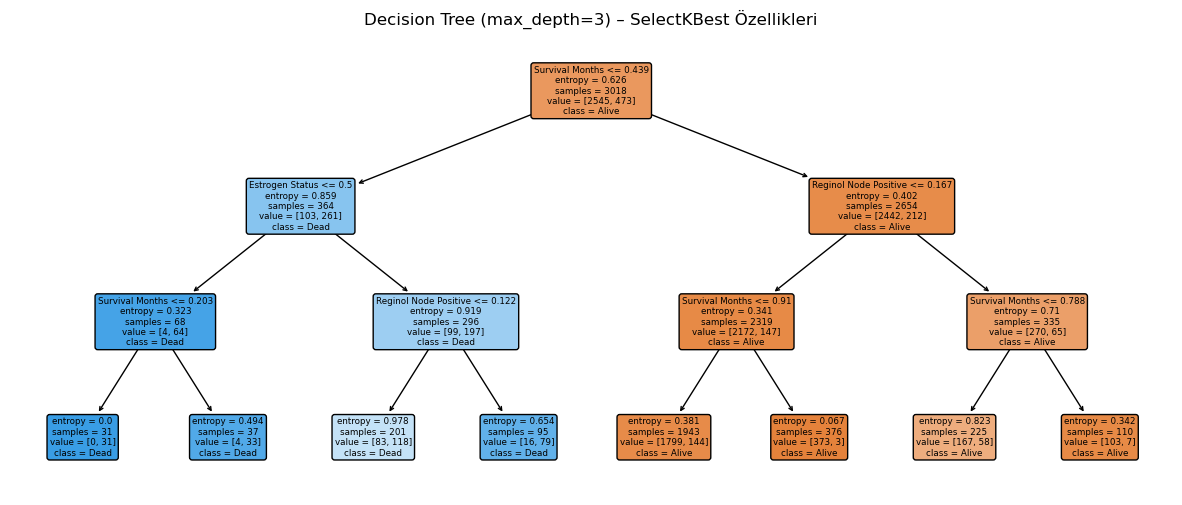

In [54]:
plt.figure(figsize=(15, 6))
plot_tree(model, feature_names=skb_features, class_names=['Alive', 'Dead'], filled=True, rounded=True)
plt.title("Decision Tree (max_depth=3) – SelectKBest Özellikleri")
plt.show()

In [55]:
X = X_scaled_df[rfe_features]
y = LabelEncoder().fit_transform(df_encoded["Status"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("📘 [RFE] Decision Tree (max_depth=3) Raporu:\n")
print(classification_report(y_test, y_pred, target_names=["Alive", "Dead"]))


📘 [RFE] Decision Tree (max_depth=3) Raporu:

              precision    recall  f1-score   support

       Alive       0.93      0.97      0.95       863
        Dead       0.74      0.57      0.64       143

    accuracy                           0.91      1006
   macro avg       0.84      0.77      0.80      1006
weighted avg       0.90      0.91      0.91      1006



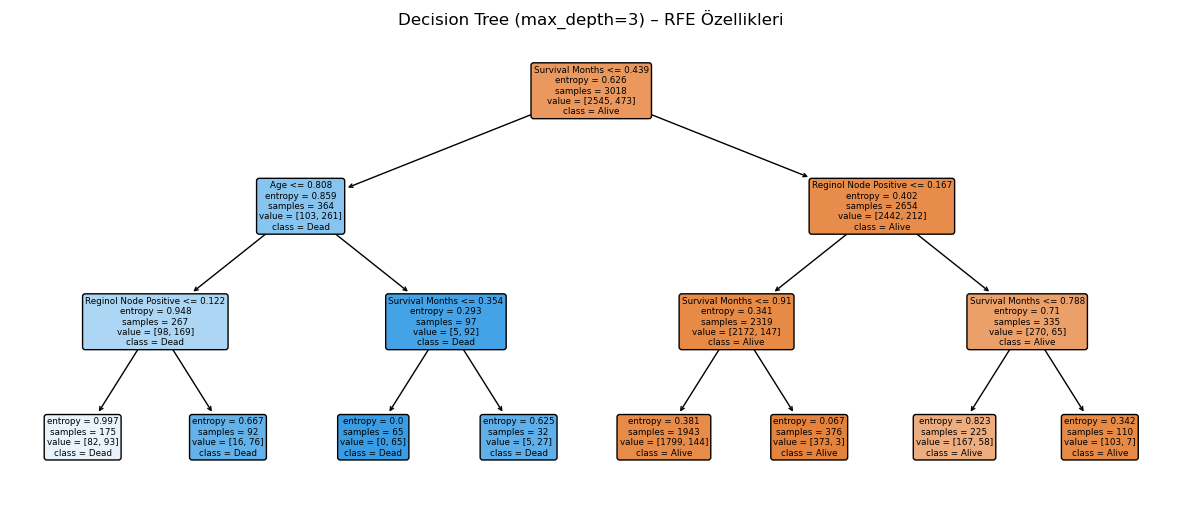

In [56]:

plt.figure(figsize=(15, 6))
plot_tree(model, feature_names=rfe_features, class_names=['Alive', 'Dead'], filled=True, rounded=True)
plt.title("Decision Tree (max_depth=3) – RFE Özellikleri")
plt.show()

In [57]:
X = X_scaled_df[rf_features]
y = LabelEncoder().fit_transform(df_encoded["Status"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("📘 [Feature Importance] Decision Tree (max_depth=3) Raporu:\n")
print(classification_report(y_test, y_pred, target_names=["Alive", "Dead"]))

📘 [Feature Importance] Decision Tree (max_depth=3) Raporu:

              precision    recall  f1-score   support

       Alive       0.93      0.97      0.95       863
        Dead       0.74      0.57      0.64       143

    accuracy                           0.91      1006
   macro avg       0.84      0.77      0.80      1006
weighted avg       0.90      0.91      0.91      1006



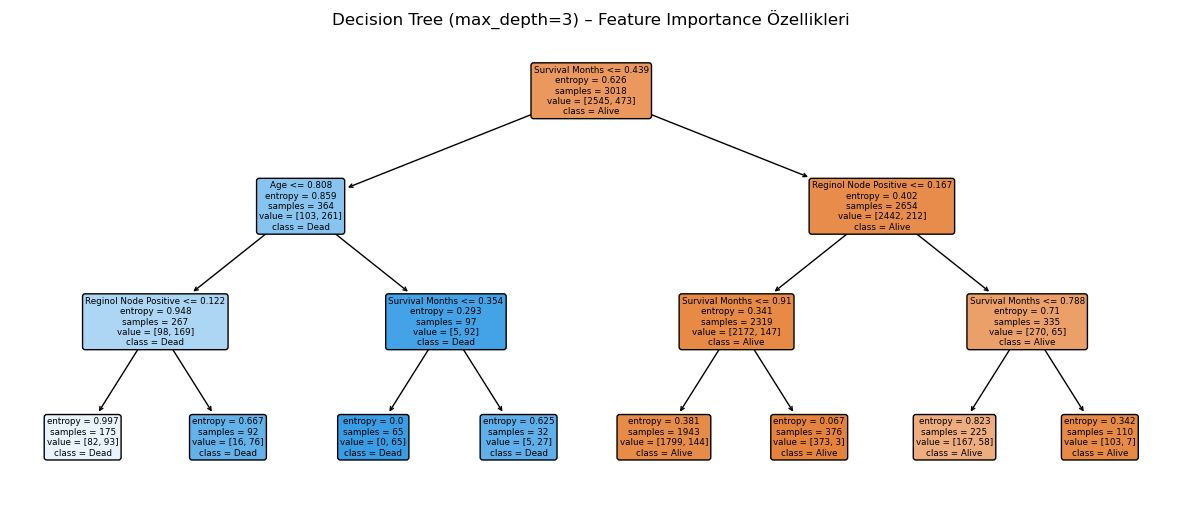

In [58]:
plt.figure(figsize=(15, 6))
plot_tree(model, feature_names=rf_features, class_names=['Alive', 'Dead'], filled=True, rounded=True)
plt.title("Decision Tree (max_depth=3) – Feature Importance Özellikleri")
plt.show()

In [59]:
import pickle

# Örnek olarak RandomForest kullanıldı, senin koduna göre değiştirebiliriz
X = df_encoded.drop("Status", axis=1)
y = df_encoded["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Modeli kaydet
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
